# milestone 1 
### load datasets and EDA
### there are some main steps in EDA 
#### 1️⃣ Load data and Understand structure
#### 2️⃣ handle missing value 
#### 3️⃣ resample data
#### 4️⃣ Summary statistics 
#### 5️⃣ Detect outliers
#### 6️⃣ time series pattern
#### 7️⃣ Correlation analysis


## IMPORT LIBRARIES


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set default plotting style 
sns.set(style="whitegrid")


pollutant_cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]




# 1.load and inspect dataset and understand structure


In [7]:
df=pd.read_csv("air_quality_data.csv")
print("data loaded successfullly")
print(df.shape)   #no. of rows and columns
print(df.head())  #first few rows

CLEANED_CSV = "cleaned_air_quality_hourly.csv"

print(df.info())
print(df.isnull().sum())

#visualize missing value
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap")
plt.show()



data loaded successfullly
(29531, 16)
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
-

AttributeError: module 'plotly.express' has no attribute 'figure'

In [4]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).sort_values("Date")


df['PM2.5'] = df['PM2.5'].interpolate(method='pad')   # Forward fill
df['PM2.5'] = df['PM2.5'].interpolate(method='bfill') # Backward fill

df['PM10']=df['PM10'].interpolate(method='pad')
df['PM10'] = df['PM10'].interpolate(method='bfill')
df['NO2'] = df['NO2'].interpolate(method='bfill')
df['O3'] = df['O3'].interpolate(method='bfill')
df['SO2'] = df['SO2'].interpolate(method='bfill')
print(df.head())

C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:5: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM2.5'] = df['PM2.5'].interpolate(method='pad')   # Forward fill
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:6: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM2.5'] = df['PM2.5'].interpolate(method='bfill') # Backward fill
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:8: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM10']=df['PM10'].interpolate(method='pad')
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:9: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfil

            City       Date   PM2.5    PM10     NO    NO2     NOx    NH3  \
0      Ahmedabad 2015-01-01  313.22  607.98   0.92  18.22   17.15    NaN   
7834     Chennai 2015-01-01  313.22  607.98  16.30  15.39   22.68   4.59   
10229      Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59  33.85   
19846    Lucknow 2015-01-01  313.22  607.98   2.11  13.46    4.57    NaN   
21855     Mumbai 2015-01-01  313.22  607.98    NaN  17.33   27.38    NaN   

          CO     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0       0.92   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
7834    1.17    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
10229  15.20    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
19846  12.15  169.57   25.92     1.35     3.93     NaN    NaN        NaN  
21855   0.00    3.54   10.73     0.00     0.00    0.00    NaN        NaN  


# 2.Understand structure


<class 'pandas.core.frame.DataFrame'>
Index: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), float

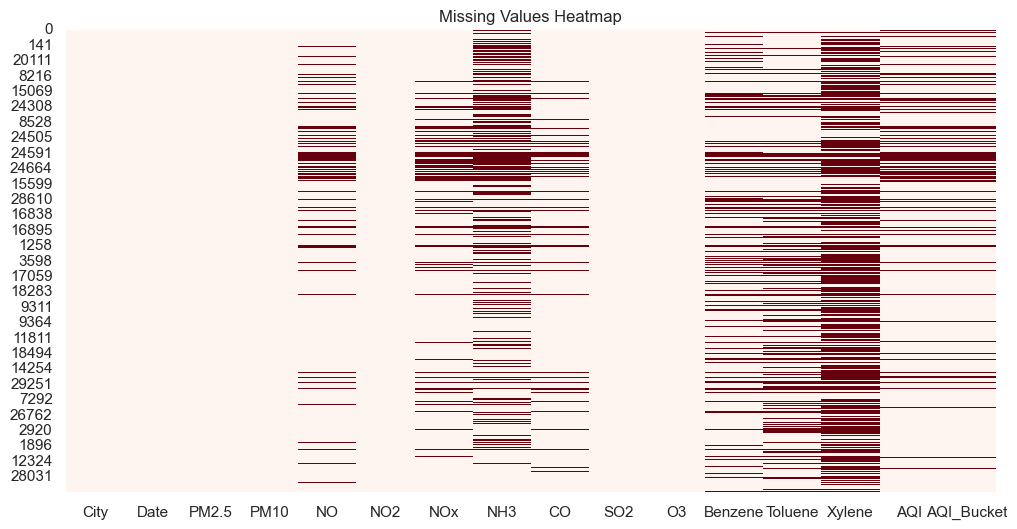

In [5]:
print(df.info())
print(df.isnull().sum())

#visualize missing value
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap")
plt.show()



# 2.handle empty data

In [6]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).sort_values("Date")


df['PM2.5'] = df['PM2.5'].interpolate(method='pad')   # Forward fill
df['PM2.5'] = df['PM2.5'].interpolate(method='bfill') # Backward fill

df['PM10']=df['PM10'].interpolate(method='pad')
df['PM10'] = df['PM10'].interpolate(method='bfill')
df['NO2'] = df['NO2'].interpolate(method='bfill')
df['O3'] = df['O3'].interpolate(method='bfill')
df['SO2'] = df['SO2'].interpolate(method='bfill')
print(df.head())

            City       Date   PM2.5    PM10     NO    NO2     NOx    NH3  \
0      Ahmedabad 2015-01-01  313.22  607.98   0.92  18.22   17.15    NaN   
7834     Chennai 2015-01-01  313.22  607.98  16.30  15.39   22.68   4.59   
10229      Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59  33.85   
19846    Lucknow 2015-01-01  313.22  607.98   2.11  13.46    4.57    NaN   
21855     Mumbai 2015-01-01  313.22  607.98    NaN  17.33   27.38    NaN   

          CO     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0       0.92   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
7834    1.17    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
10229  15.20    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
19846  12.15  169.57   25.92     1.35     3.93     NaN    NaN        NaN  
21855   0.00    3.54   10.73     0.00     0.00    0.00    NaN        NaN  


C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:5: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM2.5'] = df['PM2.5'].interpolate(method='pad')   # Forward fill
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:6: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM2.5'] = df['PM2.5'].interpolate(method='bfill') # Backward fill
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:8: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM10']=df['PM10'].interpolate(method='pad')
C:\Users\vsr\AppData\Local\Temp\ipykernel_2464\2201658601.py:9: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfil

# 3.resample time series(hourly/daily)


In [43]:
df = pd.read_csv("air_quality_data.csv")
print(df.columns)
# Check if Date column exists
if "Date" not in df.columns:
    raise ValueError("❌ ERROR: 'Date' column is missing in the CSV!")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
bad_dates = df["Date"].isna().sum()

print(f"⚠️ Unparsed Date rows: {bad_dates}")
df = df.dropna(subset=["Date"]).sort_values("Date")
city_hourly_data = []

for city, group in df.groupby("City"):
    group = group.set_index("Date").sort_index()

    if not isinstance(group.index, pd.DatetimeIndex):
        print(f"❌ ERROR: {city} index is not datetime!")
        continue

    hourly = group.resample("H").interpolate()
    hourly["City"] = city
    city_hourly_data.append(hourly)
df_hourly = (
    pd.concat(city_hourly_data)
      .reset_index()
      .sort_values(["City", "Date"])
)
print("Hourly resampled shape:", df_hourly.shape)

# Save cleaned CSV
df_hourly.to_csv(CLEANED_CSV, index=False)
print("💾 Cleaned hourly CSV saved to:", CLEANED_CSV)
print(df_hourly.head())



df_hourly['PM2.5'] = df_hourly['PM2.5'].interpolate(method='pad')   # Forward fill
df_hourly['PM2.5'] = df_hourly['PM2.5'].interpolate(method='bfill') # Backward fill
df_hourly['PM10']=df_hourly['PM10'].interpolate(method='pad')
df_hourly['PM10'] = df_hourly['PM10'].interpolate(method='bfill')
df_hourly['NO2'] = df_hourly['NO2'].interpolate(method='bfill')
df_hourly['O3'] = df_hourly['O3'].interpolate(method='bfill')
df_hourly['SO2'] = df_hourly['SO2'].interpolate(method='bfill')
print(df_hourly.head())

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
⚠️ Unparsed Date rows: 0


C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:20: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:20: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp

Hourly resampled shape: (708146, 16)
💾 Cleaned hourly CSV saved to: cleaned_air_quality_hourly.csv
                 Date       City  PM2.5  PM10        NO        NO2       NOx  \
0 2015-01-01 00:00:00  Ahmedabad    NaN   NaN  0.920000  18.220000  17.15000   
1 2015-01-01 01:00:00  Ahmedabad    NaN   NaN  0.922083  18.114583  17.12125   
2 2015-01-01 02:00:00  Ahmedabad    NaN   NaN  0.924167  18.009167  17.09250   
3 2015-01-01 03:00:00  Ahmedabad    NaN   NaN  0.926250  17.903750  17.06375   
4 2015-01-01 04:00:00  Ahmedabad    NaN   NaN  0.928333  17.798333  17.03500   

   NH3        CO       SO2        O3   Benzene   Toluene    Xylene  AQI  \
0  NaN  0.920000  27.64000  133.3600  0.000000  0.020000  0.000000  NaN   
1  NaN  0.922083  27.51125  129.2225  0.153333  0.248333  0.157083  NaN   
2  NaN  0.924167  27.38250  125.0850  0.306667  0.476667  0.314167  NaN   
3  NaN  0.926250  27.25375  120.9475  0.460000  0.705000  0.471250  NaN   
4  NaN  0.928333  27.12500  116.8100  0.61333

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:37: FutureWarning:

Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:38: FutureWarning:

Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:39: FutureWarning:

Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:40: FutureWarning:

Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\3280910509.py:41: FutureWarning:

Series.interpolate with method=bfill is deprecated and will raise in a future version. 

                 Date       City  PM2.5    PM10        NO        NO2  \
0 2015-01-01 00:00:00  Ahmedabad  73.24  141.54  0.920000  18.220000   
1 2015-01-01 01:00:00  Ahmedabad  73.24  141.54  0.922083  18.114583   
2 2015-01-01 02:00:00  Ahmedabad  73.24  141.54  0.924167  18.009167   
3 2015-01-01 03:00:00  Ahmedabad  73.24  141.54  0.926250  17.903750   
4 2015-01-01 04:00:00  Ahmedabad  73.24  141.54  0.928333  17.798333   

        NOx  NH3        CO       SO2        O3   Benzene   Toluene    Xylene  \
0  17.15000  NaN  0.920000  27.64000  133.3600  0.000000  0.020000  0.000000   
1  17.12125  NaN  0.922083  27.51125  129.2225  0.153333  0.248333  0.157083   
2  17.09250  NaN  0.924167  27.38250  125.0850  0.306667  0.476667  0.314167   
3  17.06375  NaN  0.926250  27.25375  120.9475  0.460000  0.705000  0.471250   
4  17.03500  NaN  0.928333  27.12500  116.8100  0.613333  0.933333  0.628333   

   AQI AQI_Bucket  
0  NaN        NaN  
1  NaN        NaN  
2  NaN        NaN  
3  NaN

In [37]:
print(df.head())

            City       Date   PM2.5    PM10     NO    NO2     NOx    NH3  \
0      Ahmedabad 2015-01-01     NaN     NaN   0.92  18.22   17.15    NaN   
7834     Chennai 2015-01-01     NaN     NaN  16.30  15.39   22.68   4.59   
10229      Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59  33.85   
19846    Lucknow 2015-01-01     NaN     NaN   2.11  13.46    4.57    NaN   
21855     Mumbai 2015-01-01     NaN     NaN    NaN    NaN   27.38    NaN   

          CO     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0       0.92   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
7834    1.17    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
10229  15.20    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
19846  12.15  169.57   25.92     1.35     3.93     NaN    NaN        NaN  
21855   0.00     NaN     NaN     0.00     0.00    0.00    NaN        NaN  


In [28]:
print(df.index.name)
print("Index name :", df.index.name)
print("Index type :", type(df.index))
print("Has Date column? :", "Date" in df.columns)



None
Index name : None
Index type : <class 'pandas.core.indexes.range.RangeIndex'>
Has Date column? : False


In [44]:
# --------------------------
# FIX: Convert Date to datetime
print(df.columns)
# --------------------------
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).sort_values("Date")

# --------------------------
# HOURLY RESAMPLE PER CITY
# --------------------------
city_hourly_data = []

for city, group in df.groupby("City"):
    g = group.set_index("Date").sort_index()

    # Ensure index is datetime
    if not isinstance(g.index, pd.DatetimeIndex):
        print(f"❌ Error: {city} group index is not datetime. Skipping.")
        continue

    hourly = g.resample("h").interpolate()
    hourly["City"] = city
    city_hourly_data.append(hourly)

df_hourly = (
    pd.concat(city_hourly_data)
      .reset_index()
      .sort_values(["City", "Date"])
)

print("Hourly resampled shape:", df_hourly.shape)

# Save cleaned CSV
df_hourly.to_csv(CLEANED_CSV, index=False)
print("💾 Cleaned hourly CSV saved to:", CLEANED_CSV)
print(pd.head(CLEANED_CSV))


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2127024132.py:21: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2127024132.py:21: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2127024132.py:21: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2127024132.py:21: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\21270

Hourly resampled shape: (708146, 16)
💾 Cleaned hourly CSV saved to: cleaned_air_quality_hourly.csv


AttributeError: module 'pandas' has no attribute 'head'

# 4. Descriptive Statistics

                                Date          PM2.5           PM10  \
count                         708146  650018.000000  480625.000000   
mean   2018-05-14 01:23:14.732725248      67.309445     117.685967   
min              2015-01-01 00:00:00       0.040000       0.010000   
25%              2017-04-15 22:15:00      28.788437      56.355000   
50%              2018-08-04 18:00:00      49.075000      95.695000   
75%              2019-09-02 13:00:00      81.999063     150.291250   
max              2020-07-01 00:00:00     949.990000    1000.000000   
std                              NaN      62.487310      88.841818   

                  NO            NO2            NOx            NH3  \
count  679850.000000  679826.000000  670657.000000  506761.000000   
mean       19.116966      27.802533      33.140283      24.336398   
min         0.020000       0.010000       0.000000       0.010000   
25%         5.938750      11.628333      13.684167       8.387708   
50%        10.152500    

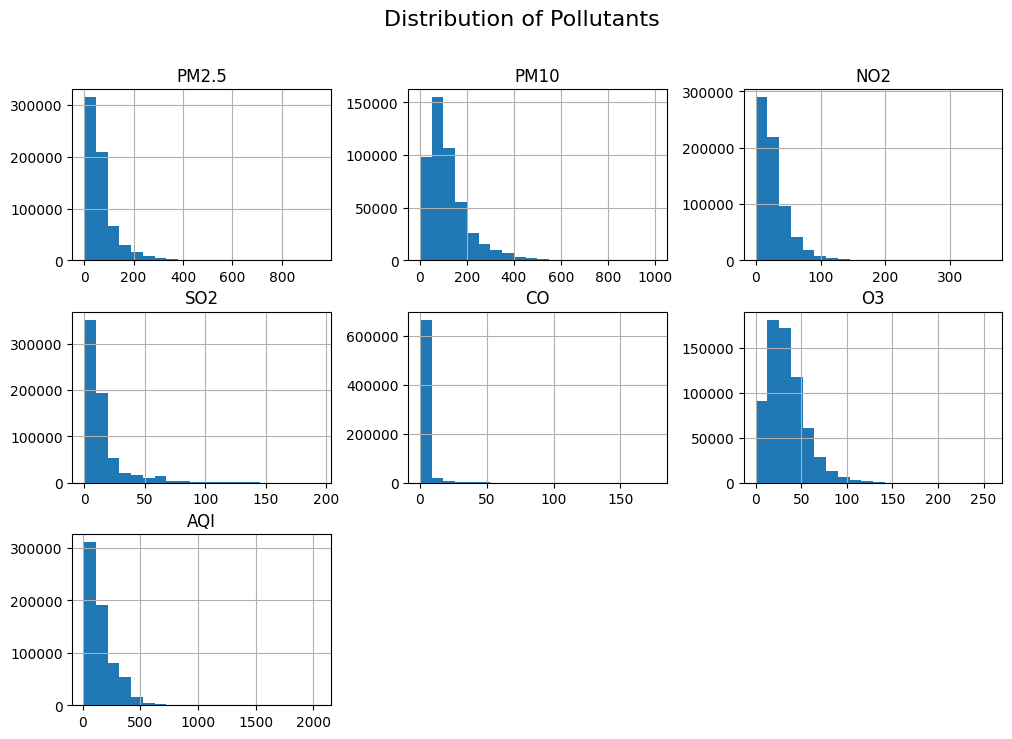

In [46]:
print(df_hourly.describe())
cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "AQI"]
df_hourly[cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Pollutants", fontsize=16)
plt.show()


# 5. Outlier Detection

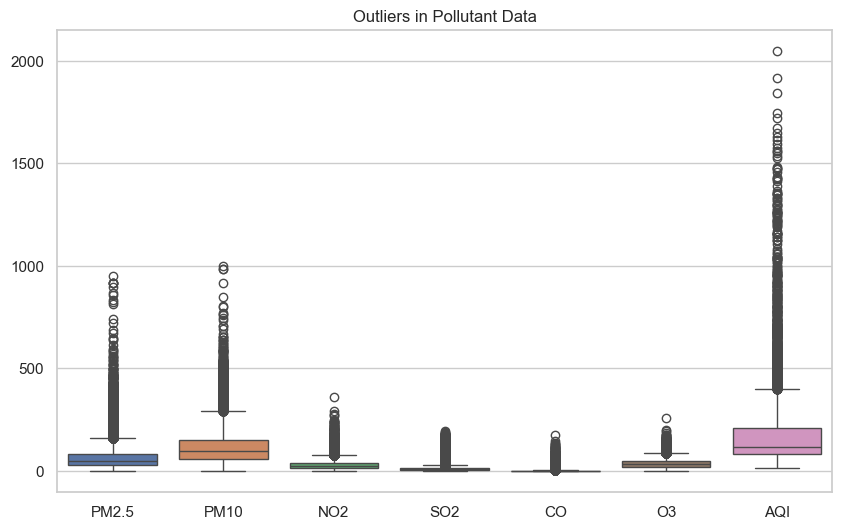

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[cols])
plt.title("Outliers in Pollutant Data")
plt.show()


# 6. Time-Series Patterns

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# --- Step 1: Prepare data ---
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# IMPORTANT: Do NOT set index before groupby-resample.
# Because each city needs its own datetime index, not global index.
# So we resample inside group.
# df.set_index('Date', inplace=True)  # ❌ Remove this line

# --- Step 2: Resample hourly for each city ---
city_hourly = []

for city, group in df.groupby('City'):
    group = group.set_index('Date')   # ✔ set index per city
    group_hourly = group.resample('H').interpolate()
    group_hourly['City'] = city
    city_hourly.append(group_hourly)

df_hourly = pd.concat(city_hourly)
df_hourly = df_hourly.sort_index()  # ✔ always good practice

# --- Step 3: Dropdown options ---
cities = sorted(df_hourly['City'].unique())
pollutants = [col for col in df_hourly.columns if col not in ["City"]]
time_ranges = ["Last 24 Hours", "Last 7 Days", "Last 30 Days", "All Time"]

# --- Step 4: Interactive Plot ---
@interact(city=cities, pollutant=pollutants, time_range=time_ranges)
def plot_pollutant(city, pollutant, time_range):
    plt.figure(figsize=(12, 6))

    # Filter city
    data = df_hourly[df_hourly['City'] == city]

    # Filter by time range
    if time_range == "Last 24 Hours":
        data = data.last('24H')
    elif time_range == "Last 7 Days":
        data = data.last('7D')
    elif time_range == "Last 30 Days":
        data = data.last('30D')

    # Plot
    plt.plot(data.index, data[pollutant], label=f"{pollutant} in {city}")
    plt.title(f"{pollutant} Over Time in {city} ({time_range})")
    plt.xlabel("Date/Time")
    plt.ylabel(pollutant)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2642250604.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2642250604.py:19: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2642250604.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2642250604.py:19: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

C:\Users\vsr\AppData\Local\Temp\ipykernel_1352\2642250604.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\vsr\AppData\Local\Temp

interactive(children=(Dropdown(description='city', options=('Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'B…

# 7.correlation analysis

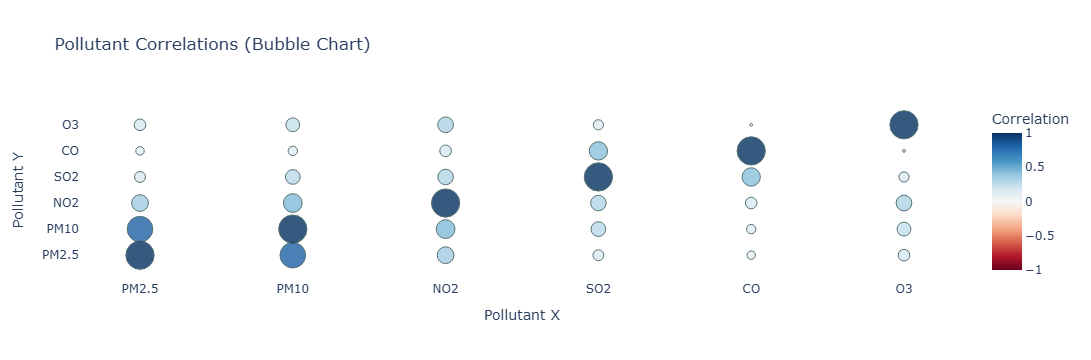

In [54]:
import plotly.express as px

pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
corr = df_hourly[pollutant_cols].corr().round(2)
corr_long = corr.stack().reset_index()
corr_long.columns = ['Pollutant_X', 'Pollutant_Y', 'Correlation']


fig = px.scatter(
    corr_long,
    x='Pollutant_X',
    y='Pollutant_Y',
    size=corr_long['Correlation'].abs() * 30,  # bubble size based on abs correlation
    color='Correlation',
    color_continuous_scale='RdBu',
    range_color=[-1, 1],
    hover_data={'Correlation': True},
    title='Pollutant Correlations (Bubble Chart)',
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    xaxis_title='Pollutant X',
    yaxis_title='Pollutant Y',
    plot_bgcolor='white',
    font=dict(size=12),
)
fig.show()

